# Trajectory Example

In [ ]:
import numpy as np

n = 1000
lons = np.linspace(0, 5*360, n)
lats = np.linspace(-85, 85, n)
linspace = np.stack([lats, lons], axis=1)
pts = linspace.tolist()

import earthkit.data

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,
    "time" : 0,
    "levtype" : "sfc",
    "expver" : 1,
    "domain" : "g",
    "param" : [ 167 ],
    "number" : [ 1 ],
    "step": [ 0 ],
    "feature" :{ 
        "type" : "trajectory", 
        "points" : pts, 
        "inflation" : 0.1, 
        "inflate" : "round",
        "axes" :["latitude", "longitude"], 
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

## Convert to xarray

In [5]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 847kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 21170)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2024-11-17T00:00:00Z'
  * number     (number) int64 8B 1
  * steps      (steps) int64 8B 0
  * points     (points) int64 169kB 0 1 2 3 4 ... 21165 21166 21167 21168 21169
    x          (points) float64 169kB -84.96 -84.89 -84.82 ... 84.96 85.03 85.1
    y          (points) float64 169kB 0.0 1.169 1.154 2.278 ... 358.8 0.0 0.0
    t          (points) int64 169kB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Data variables:
    2t         (datetimes, number, steps, points) float64 169kB 237.9 ... 255.2
Attributes:
    class:          od
    Forecast date:  2024-11-17T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    number:         1
    step:           0
    stream:         enfo
    type:           pf

# Visualise

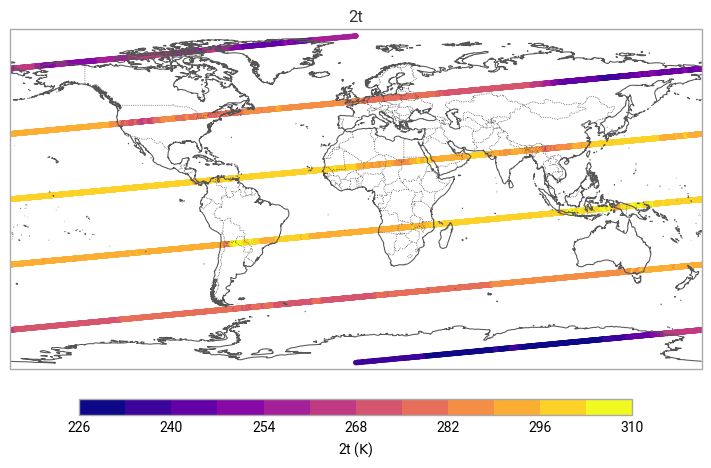

In [6]:
import earthkit.plots

chart = earthkit.plots.Map()
chart.point_cloud(da['2t'], x="y", y="x")
chart.coastlines()
chart.borders()
chart.title("{variable_name}")
chart.legend()
chart.show()